<a href="https://colab.research.google.com/github/v0idengineer/analisis-sentimen-cs2-svm/blob/main/notebooks/svm_model_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
aspects = {
    'gameplay': {
        'en': [
            'gameplay', 'play', 'game', 'control', 'movement', 'mechanic', 'experience', 'action', 'strategy', 'mode',
            'match', 'round', 'gunplay', 'combat', 'map', 'level', 'difficulty', 'strategy', 'tactics', 'teambased',
            'shooting', 'aim', 'fire', 'gun', 'reaction', 'input', 'skill', 'timing', 'practice', 'balance'
        ]
    },
    'performance': {
        'en': [
            'performance', 'fps', 'frame', 'lag', 'smooth', 'stutter', 'optimization', 'loading', 'speed', 'response',
            'rate', 'glitch', 'low', 'high', 'texture load', 'frame', 'server', 'ping',
            'optimization', 'drop', 'improvement', 'delay'
        ]
    },
    'visuals': {
        'en': [
            'graphics', 'visual', 'texture', 'resolution', 'detail', 'lighting', 'shadows', 'render', 'color', 'effects',
            'design', 'art', 'environment', 'model', 'background', 'scenery', 'view', 'animation', 'textures', 'frame',
            'resolution', 'clarity', 'realism', 'depth', 'reflection', 'particle', 'quality', 'style', 'fps', 'engine'
        ]
    },
    'players': {
        'en': [
            'player', 'teammate', 'enemy', 'match', 'community', 'multiplayer', 'teammates', 'opponent', 'teamwork', 'fight',
            'playerbase', 'competitors', 'rank', 'casual', 'competitive', 'co-op', 'solo', 'duo', 'enemy team',
            'friendly fire', 'communication', 'interaction', 'strategy', 'kill', 'death', 'win', 'behavior',
            'sense', 'teaming', 'attitude', 'skill'
        ]
    }
}


**TF-IDF**

In [ ]:
import pandas as pd
from collections import Counter

# Daftar stopword sederhana (bisa ditambah sesuai kebutuhan)
stopwords = {
    'the', 'is', 'and', 'in', 'to', 'a', 'of', 'it', 'for', 'on', 'with', 'as', 'that', 'this',
    'i', 'you', 'at', 'be', 'are', 'was', 'but', 'not', 'have', 'they', 'we', 'he', 'she', 'or',
    'an', 'by', 'from', 'so', 'if', 'all', 'my', 'just', 'like', 'me', 'your', 'up', 'about', 'do', 'get', 'cheat', 'game', 'play', 'make', 'cs'
}

# Load data CSV
df = pd.read_csv('dataset_cleaned_with_aspectsv2.csv')

# Ambil kolom lemmatized_reviews dan gabungkan semua dokumen jadi satu string
documents = df['lemmatized_reviews'].dropna().tolist()
all_words = " ".join(documents).lower().split()  # lower supaya konsisten

# Filter kata agar bukan stopword
filtered_words = [word for word in all_words if word not in stopwords]

# Hitung frekuensi kata setelah stopword removal
word_freq = Counter(filtered_words)

# Tampilkan 10 kata paling sering muncul
print("10 kata paling sering muncul (setelah stopword removal) beserta frekuensinya:")
print(word_freq.most_common(10))


10 kata paling sering muncul (setelah stopword removal) beserta frekuensinya:
[('good', 2158), ('cheater', 1673), ('player', 938), ('time', 878), ('fun', 828), ('well', 802), ('valve', 706), ('every', 701), ('still', 697), ('bad', 686)]


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
import pandas as pd
from collections import Counter
import math

# Stopwords yang sudah kamu pakai
stopwords = {
    'the', 'is', 'and', 'in', 'to', 'a', 'of', 'it', 'for', 'on', 'with', 'as', 'that', 'this',
    'i', 'you', 'at', 'be', 'are', 'was', 'but', 'not', 'have', 'they', 'we', 'he', 'she', 'or',
    'an', 'by', 'from', 'so', 'if', 'all', 'my', 'just', 'like', 'me', 'your', 'up', 'about', 'do', 'get', 'cheat', 'game', 'play', 'make', 'cs'
}

# Load data CSV
df = pd.read_csv('dataset_cleaned_with_aspectsv2.csv')

# Ambil kolom lemmatized_reviews, hapus NaN dan lowercase
documents = df['lemmatized_reviews'].dropna().str.lower().tolist()

# Tokenisasi dan filter stopword per dokumen
tokenized_docs = []
for doc in documents:
    words = doc.split()
    filtered = [w for w in words if w not in stopwords]
    tokenized_docs.append(filtered)

# Gabungkan semua kata dari seluruh dokumen untuk hitung frekuensi total (TF numerator)
all_words = [word for doc in tokenized_docs for word in doc]

# Hitung frekuensi kata total
word_freq = Counter(all_words)

# Total kata setelah stopword removal (untuk normalisasi TF)
total_words = len(all_words)

# Hitung TF per kata (frekuensi kata / total kata)
tf = {word: freq / total_words for word, freq in word_freq.items()}

# Hitung IDF per kata
N = len(tokenized_docs)  # total dokumen

# Buat dict jumlah dokumen yang mengandung kata (document frequency)
doc_freq = {}
for word in word_freq.keys():
    count = sum(1 for doc in tokenized_docs if word in doc)
    doc_freq[word] = count

# Rumus IDF dengan smooth
idf = {word: math.log((N + 1) / (df + 1)) + 1 for word, df in doc_freq.items()}

# Hitung TF-IDF
tf_idf = {word: tf[word] * idf[word] for word in word_freq.keys()}

# Tampilkan 10 kata paling sering dan nilai TF, IDF, TF-IDF-nya
top_10 = word_freq.most_common(10)
print("Kata | TF | IDF | TF-IDF")
for word, freq in top_10:
    print(f"{word} | {tf[word]:.6f} | {idf[word]:.6f} | {tf_idf[word]:.6f}")


Kata | TF | IDF | TF-IDF
good | 0.018249 | 2.389012 | 0.043597
cheater | 0.014148 | 2.758917 | 0.039032
player | 0.007932 | 3.451277 | 0.027376
time | 0.007425 | 3.363872 | 0.024976
fun | 0.007002 | 3.334019 | 0.023345
well | 0.006782 | 3.411148 | 0.023135
valve | 0.005970 | 3.594983 | 0.021463
every | 0.005928 | 3.557512 | 0.021089
still | 0.005894 | 3.529877 | 0.020806
bad | 0.005801 | 3.585933 | 0.020802


**EKSPLORASI DATA KESELURUHAN**

In [ ]:
import pandas as pd

# Load the dataset
dataset_cleaned = pd.read_csv("dataset_non_indonesian.csv")

# Define the aspect identification function (only for English)
def identify_aspects(text):
    aspects_detected = {aspect: 0 for aspect in aspects}  # Initialize results

    for aspect, keywords_dict in aspects.items():
        keywords = keywords_dict.get("en", [])  # Get English keywords for the aspect
        words = text.lower().split()  # Split the text into words
        for word in words:
            if word in keywords:
                aspects_detected[aspect] += 1

    return aspects_detected

# Function to apply the aspect identification to each row
def apply_aspects(row):
    text = row['lemmatized_reviews']
    return identify_aspects(text)

# Apply the function to the dataset
dataset_cleaned['aspects'] = dataset_cleaned.apply(apply_aspects, axis=1)

# Example output of the first few rows
print("Example of aspect identification results:")
print(dataset_cleaned[['lemmatized_reviews', 'aspects']].head())

Example of aspect identification results:
                                  lemmatized_reviews  \
0  good game rip aim everytime see enemy either I...   
1                valve support ur new game tf update   
2                                       many cheater   
3                     hard competitive game valorant   
4                                       much cheater   

                                             aspects  
0  {'gameplay': 2, 'performance': 0, 'visuals': 0...  
1  {'gameplay': 1, 'performance': 0, 'visuals': 0...  
2  {'gameplay': 0, 'performance': 0, 'visuals': 0...  
3  {'gameplay': 1, 'performance': 0, 'visuals': 0...  
4  {'gameplay': 0, 'performance': 0, 'visuals': 0...  


**EKPLORASI PER ASPEK**

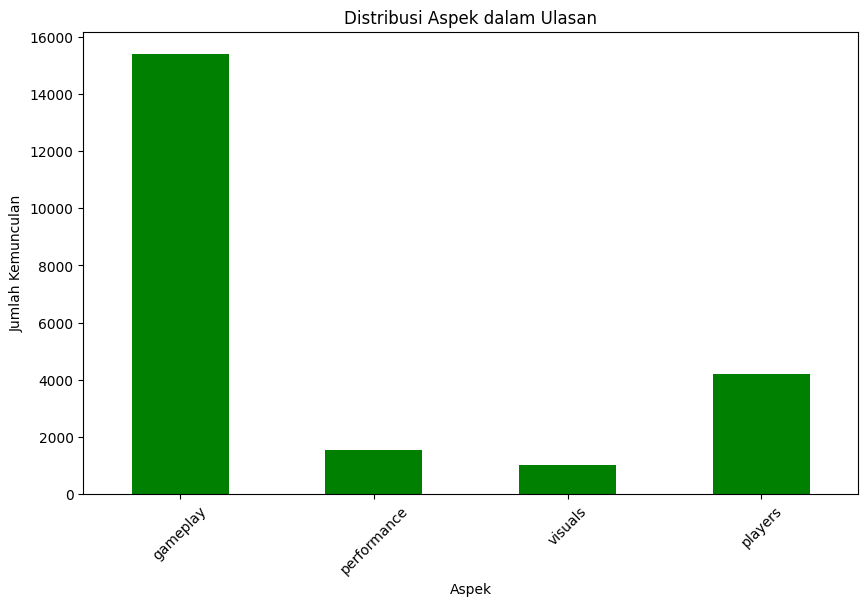

In [ ]:
# Visualisasi jumlah aspek untuk setiap bahasa
aspects_columns = list(aspects.keys())  # Daftar nama aspek
aspects_sum = dataset_cleaned['aspects'].apply(pd.Series).sum()

# Visualisasi distribusi aspek
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
aspects_sum.plot(kind='bar', color='green')
plt.title('Distribusi Aspek dalam Ulasan')
plt.xlabel('Aspek')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45)
plt.show()

# Simpan hasil ke CSV
dataset_cleaned.to_csv("dataset_cleaned_with_aspects.csv", index=False)


**DISTRIBUSI ULASAN PER ASPEK**

Number of Reviews Discussing Each Aspect (English Only):
          gameplay  performance  visuals  players  No Aspects Discussed
language                                                               
en            6856          940      592     2063                  3163


<Figure size 1000x600 with 0 Axes>

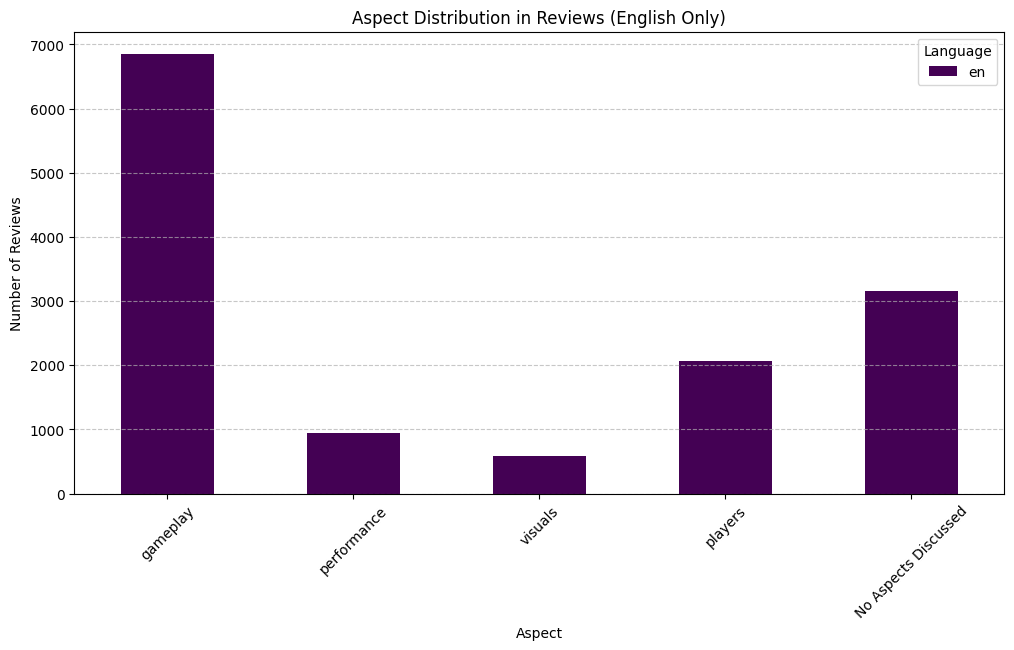

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dataset_cleaned' is your DataFrame containing the reviews
# Filter the data to only include English reviews
english_df = dataset_cleaned[dataset_cleaned['language'] == 'en']

# Calculate the number of reviews per aspect based on language
aspects_columns = list(aspects.keys())  # List of aspects
df_aspects = english_df['aspects'].apply(pd.Series)  # Break aspect column into separate columns
df_aspects['language'] = english_df['language']  # Add language column

# Count the number of reviews discussing each aspect
aspect_counts = df_aspects.groupby("language")[aspects_columns].apply(lambda x: (x > 0).sum())

# Count the number of reviews not discussing any aspect
df_aspects['no_aspect'] = df_aspects[aspects_columns].sum(axis=1) == 0  # True if all aspects = 0
no_aspect_counts = df_aspects.groupby("language")['no_aspect'].sum()  # Count per language

# Add the "No Aspects Discussed" category to the results
aspect_counts["No Aspects Discussed"] = no_aspect_counts

# Display the results
print("Number of Reviews Discussing Each Aspect (English Only):")
print(aspect_counts)

# Visualization with a bar chart
plt.figure(figsize=(10, 6))
aspect_counts.T.plot(kind='bar', figsize=(12,6), colormap="viridis")
plt.title("Aspect Distribution in Reviews (English Only)")
plt.xlabel("Aspect")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Language")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**REVIEW YANG MEMBAHAS ASPEK**



In [ ]:
# Calculate the total number of reviews in the dataset
total_reviews = len(english_df)

# Calculate the number of reviews that do not discuss any aspects
df_aspects = english_df['aspects'].apply(pd.Series)  # Break the aspect column into separate columns
df_aspects['no_aspect'] = df_aspects.sum(axis=1) == 0  # True if all aspects = 0
total_no_aspect = df_aspects['no_aspect'].sum()

# Calculate the number of reviews discussing at least one aspect
total_with_aspect = total_reviews - total_no_aspect

# Display the results
print(f"Total Reviews in Dataset: {total_reviews}")
print(f"Total Reviews Not Discussing Any Aspect: {total_no_aspect}")
print(f"Total Reviews Discussing At Least One Aspect: {total_with_aspect}")


Total Reviews in Dataset: 10530
Total Reviews Not Discussing Any Aspect: 3163
Total Reviews Discussing At Least One Aspect: 7367


**MENGHAPUS DATA YANG TIDAK MEMBAHAS ASPEK**

In [ ]:
import pandas as pd

# Misalkan dataset_cleaned adalah DataFrame yang berisi data Anda
# Hapus ulasan yang tidak membahas aspek apa pun (semua nilai aspek = 0)
dataset_cleaned = dataset_cleaned[dataset_cleaned['aspects'].apply(lambda x: sum(x.values()) > 0)]

# Tampilkan jumlah data setelah penghapusan
print(f"Jumlah data setelah menghapus yang tidak membahas aspek: {len(dataset_cleaned)}")

# Simpan dataset yang sudah dibersihkan ke file CSV
dataset_cleaned.to_csv('dataset_cleaned_with_aspectsv2.csv', index=False)


Jumlah data setelah menghapus yang tidak membahas aspek: 7367


**SPLITTING DATA**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Misalkan dataset_cleaned adalah DataFrame yang berisi data Anda
# Contoh memuat dataset
dataset_cleaned = pd.read_csv("dataset_cleaned_with_aspectsv2.csv")  # ganti dengan nama file yang kamu pakai

# Cek jumlah masing-masing label
label_counts = dataset_cleaned['sentiment_label'].value_counts()

# Tampilkan jumlah label positif, negatif, dan netral
print(f"Jumlah label positif: {label_counts['Positif']}")
print(f"Jumlah label negatif: {label_counts['Negatif']}")
print(f"Jumlah label netral: {label_counts['Netral']}")

# Bagi dataset menjadi 80% untuk pelatihan dan 20% untuk pengujian
X = dataset_cleaned['lemmatized_reviews']  # Fitur (misalnya, teks ulasan)
y = dataset_cleaned['sentiment_label']  # Label sentimen

# Membagi data (80% untuk pelatihan, 20% untuk pengujian) dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Gabungkan kembali X_train, X_test, y_train, y_test menjadi DataFrame
train_df = pd.DataFrame({'lemmatized_reviews': X_train, 'sentiment_label': y_train})
test_df = pd.DataFrame({'lemmatized_reviews': X_test, 'sentiment_label': y_test})

# Simpan data pelatihan dan pengujian ke file CSV
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("Data pelatihan dan pengujian telah dipisahkan dengan stratifikasi dan disimpan ke dalam CSV.")


Jumlah label positif: 4022
Jumlah label negatif: 2810
Jumlah label netral: 535
Data pelatihan dan pengujian telah dipisahkan dengan stratifikasi dan disimpan ke dalam CSV.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Menyaring 5000 fitur teratas

# Fit dan transformasi data pelatihan (train_df)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['lemmatized_reviews'])

# Transformasi data pengujian (test_df)
X_test_tfidf = tfidf_vectorizer.transform(test_df['lemmatized_reviews'])

# Tampilkan ukuran matriks TF-IDF untuk pelatihan dan pengujian
print(f"Ukuran matriks TF-IDF (train): {X_train_tfidf.shape}")
print(f"Ukuran matriks TF-IDF (test): {X_test_tfidf.shape}")


Ukuran matriks TF-IDF (train): (5893, 5000)
Ukuran matriks TF-IDF (test): (1474, 5000)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Menggunakan TfidfVectorizer untuk ekstraksi fitur dari teks
vectorizer = TfidfVectorizer(stop_words='english')

# Fitting dan transformasi data training
X_train_tfidf = vectorizer.fit_transform(train_df['lemmatized_reviews'])

# Transformasi data testing
X_test_tfidf = vectorizer.transform(test_df['lemmatized_reviews'])

# Membuat model SVM dengan OVR
model_svm = SVC(kernel='linear', decision_function_shape='ovr')

# Melatih model dengan data training
model_svm.fit(X_train_tfidf, train_df['sentiment_label'])

# Prediksi pada data testing
y_pred_svm = model_svm.predict(X_test_tfidf)

# Evaluasi model
print("Akurasi Model SVM (OVR):", accuracy_score(test_df['sentiment_label'], y_pred_svm))
print("\nLaporan Klasifikasi SVM (OVR):")
print(classification_report(test_df['sentiment_label'], y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix SVM (OVR):")
print(confusion_matrix(test_df['sentiment_label'], y_pred_svm))


Akurasi Model SVM (OVR): 0.819538670284939

Laporan Klasifikasi SVM (OVR):
              precision    recall  f1-score   support

     Negatif       0.81      0.80      0.81       562
      Netral       0.76      0.23      0.36       107
     Positif       0.83      0.91      0.87       805

    accuracy                           0.82      1474
   macro avg       0.80      0.65      0.68      1474
weighted avg       0.82      0.82      0.81      1474


Confusion Matrix SVM (OVR):
[[450   4 108]
 [ 38  25  44]
 [ 68   4 733]]


In [ ]:
import joblib

# Simpan model ke file
joblib.dump(svm_model, 'svm_model.pkl')


NameError: name 'svm_model' is not defined

In [ ]:
pip install imbalanced-learn


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data (misalnya 'train_data.csv' sudah ada)
train_df = pd.read_csv('train_data.csv')

# Fitur dan label
X = train_df['lemmatized_reviews']
y = train_df['sentiment_label']

# Menggunakan TF-IDF untuk mengubah teks menjadi representasi numerik
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Terapkan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Tampilkan jumlah data setelah SMOTE
print(f"Jumlah data sebelum SMOTE: {len(y_train)}")
print(f"Jumlah data setelah SMOTE: {len(y_train_resampled)}")

# Melatih model SVM dengan data yang sudah di-resample
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Melatih model SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Prediksi pada data uji
y_pred = svm_model.predict(X_test)

# Evaluasi model
print("Akurasi Model SVM dengan SMOTE:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi SVM dengan SMOTE:")
print(classification_report(y_test, y_pred))

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix sebagai array
print("Confusion Matrix:")
print(cm)

# Visualisasi confusion matrix dengan heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVM dengan SMOTE')
plt.show()

Jumlah data sebelum SMOTE: 4714
Jumlah data setelah SMOTE: 7758
Akurasi Model SVM dengan SMOTE: 0.821882951653944
Laporan Klasifikasi SVM dengan SMOTE:
              precision    recall  f1-score   support

     Negatif       0.84      0.79      0.82       466
      Netral       0.45      0.55      0.50        82
     Positif       0.87      0.88      0.87       631

    accuracy                           0.82      1179
   macro avg       0.72      0.74      0.73      1179
weighted avg       0.83      0.82      0.82      1179

Confusion Matrix:
[[369  23  74]
 [ 25  45  12]
 [ 45  31 555]]


NameError: name 'sns' is not defined

<Figure size 600x500 with 0 Axes>

**Histogram**

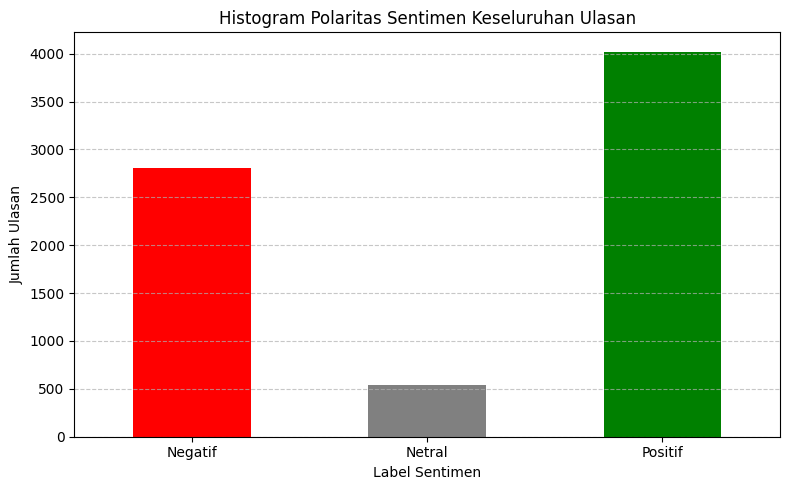

In [ ]:
import matplotlib.pyplot as plt

# Gabungkan train dan test data jika mau semua data
full_df = pd.concat([train_df, test_df])

# Hitung jumlah tiap label
sentiment_counts = full_df['sentiment_label'].value_counts()

# Buat histogram
plt.figure(figsize=(8,5))
colors = ['red', 'gray', 'green']  # Warna untuk Negatif, Netral, Positif

sentiment_counts = sentiment_counts.reindex(['Negatif', 'Netral', 'Positif'])  # Supaya urut

sentiment_counts.plot(kind='bar', color=colors)

plt.title('Histogram Polaritas Sentimen Keseluruhan Ulasan')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Eksplorasi Keseluruhan Aspek**


Jumlah Review yang Membahas Tiap Aspek:
gameplay       6856
performance     940
visuals         592
players        2063
dtype: int64


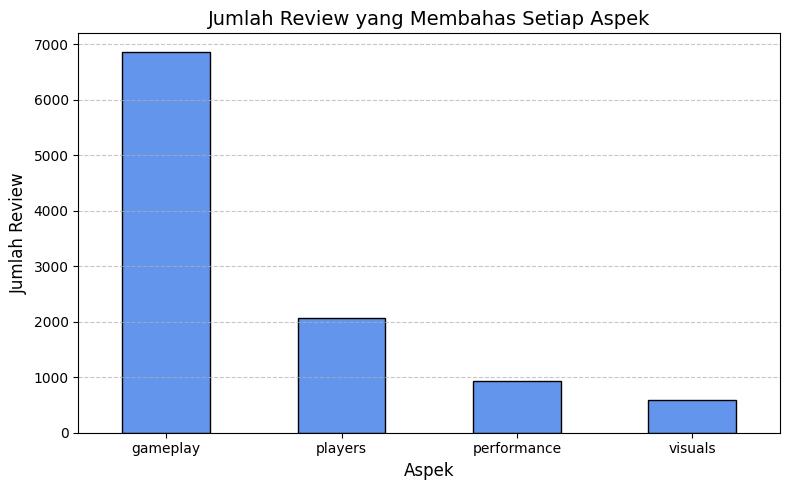

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Ubah string ke dictionary
dataset_cleaned['aspects'] = dataset_cleaned['aspects'].apply(ast.literal_eval)

# Pecah menjadi kolom-kolom aspek
aspects_df = dataset_cleaned['aspects'].apply(pd.Series)

# Hitung jumlah review yang menyebut setiap aspek (setidaknya 1 kali)
aspect_review_counts = (aspects_df > 0).sum()

# Tampilkan hasil jumlah
print("\nJumlah Review yang Membahas Tiap Aspek:")
print(aspect_review_counts)

# Visualisasi
plt.figure(figsize=(8,5))
aspect_review_counts.sort_values(ascending=False).plot(
    kind='bar', color='cornflowerblue', edgecolor='black'
)

plt.title('Jumlah Review yang Membahas Setiap Aspek', fontsize=14)
plt.xlabel('Aspek', fontsize=12)
plt.ylabel('Jumlah Review', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-15-6ff3069a59f8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


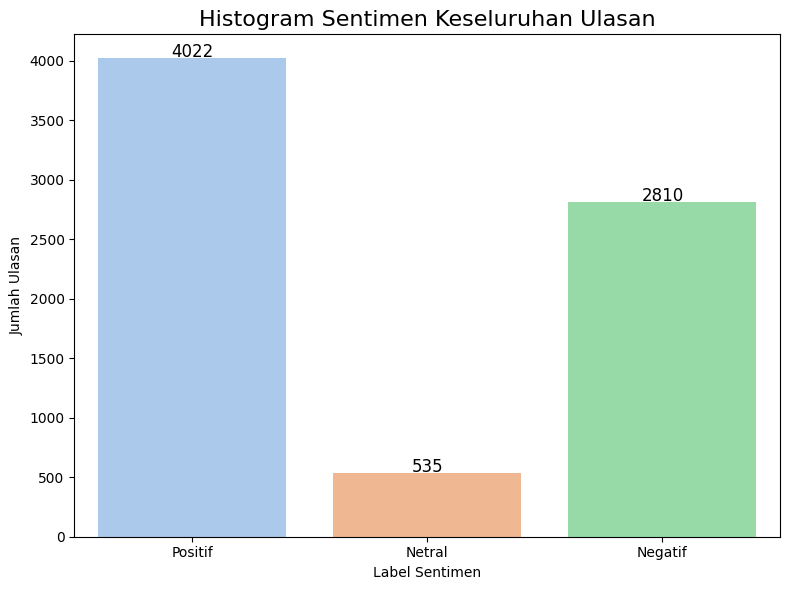

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung jumlah masing-masing label sentimen
sentiment_counts = dataset_cleaned['sentiment_label'].value_counts().reindex(['Positif', 'Netral', 'Negatif'])

# Buat histogram (bar chart)
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')

# Tambahkan angka di atas tiap bar
for i, v in enumerate(sentiment_counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)

plt.title('Histogram Sentimen Keseluruhan Ulasan', fontsize=16)
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.tight_layout()
plt.show()


**Eksplorasi Data Pada tiap Aspek**

In [ ]:
import pandas as pd

# Daftar aspek yang ada
aspects_columns = list(aspects.keys())

# Inisialisasi dictionary untuk menyimpan hasil distribusi sentimen per aspek
sentiment_distribution = {}

# Hitung distribusi sentimen untuk setiap aspek
for aspect in aspects_columns:
    # Ambil data untuk aspek tertentu
    aspect_df = dataset_cleaned[dataset_cleaned['aspects'].apply(lambda x: x.get(aspect, 0)) > 0]

    # Hitung jumlah label sentimen untuk aspek ini
    sentiment_counts = aspect_df['sentiment_label'].value_counts().reindex(['Positif', 'Negatif', 'Netral'])

    # Gantikan nilai NaN dengan 0 jika tidak ada data untuk label tersebut
    sentiment_counts = sentiment_counts.fillna(0).astype(int)

    # Simpan hasil dalam dictionary
    sentiment_distribution[aspect] = sentiment_counts

# Ubah dictionary menjadi DataFrame untuk visualisasi tabel
sentiment_df = pd.DataFrame(sentiment_distribution).T
sentiment_df.columns = ['Positif', 'Negatif', 'Netral']

# Tampilkan tabel distribusi sentimen berdasarkan aspek
print("Distribusi Sentimen Berdasarkan Aspek:")
print(sentiment_df)


Distribusi Sentimen Berdasarkan Aspek:
             Positif  Negatif  Netral
gameplay        3781     2603     472
performance      537      347      56
visuals          408      155      29
players         1077      879     107


<Figure size 1200x800 with 0 Axes>

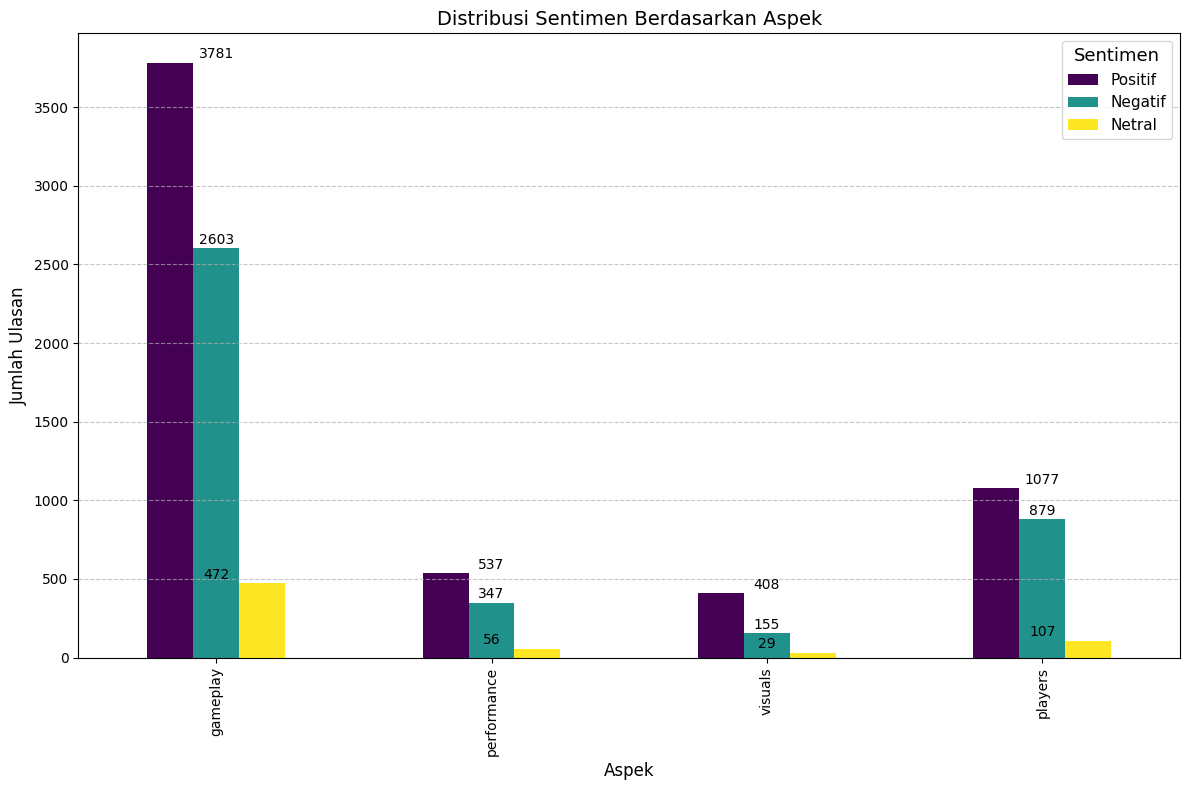

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumsikan 'sentiment_df' adalah DataFrame yang memiliki kolom untuk setiap aspek,
# dan setiap baris mewakili distribusi sentimen (positif, negatif, netral) untuk aspek tertentu.

# Buat sebuah plot untuk distribusi sentimen per aspek
plt.figure(figsize=(12, 8))

# Plot bar chart untuk distribusi sentimen per aspek
ax = sentiment_df.plot(kind='bar', stacked=False, figsize=(12, 8), colormap='viridis')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Aspek', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)

# Menambahkan judul
plt.title('Distribusi Sentimen Berdasarkan Aspek', fontsize=14)

# Menambahkan angka di atas setiap bar (per sentimen)
for i in range(len(sentiment_df)):
    for j, col in enumerate(sentiment_df.columns):
        value = sentiment_df.iloc[i, j]  # Mengambil nilai dari DataFrame
        plt.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Menampilkan legenda
plt.legend(title="Sentimen", title_fontsize='13', fontsize='11')

# Menampilkan grid pada sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


**Awan Kata**

Gameplay Pos, Neg, Net


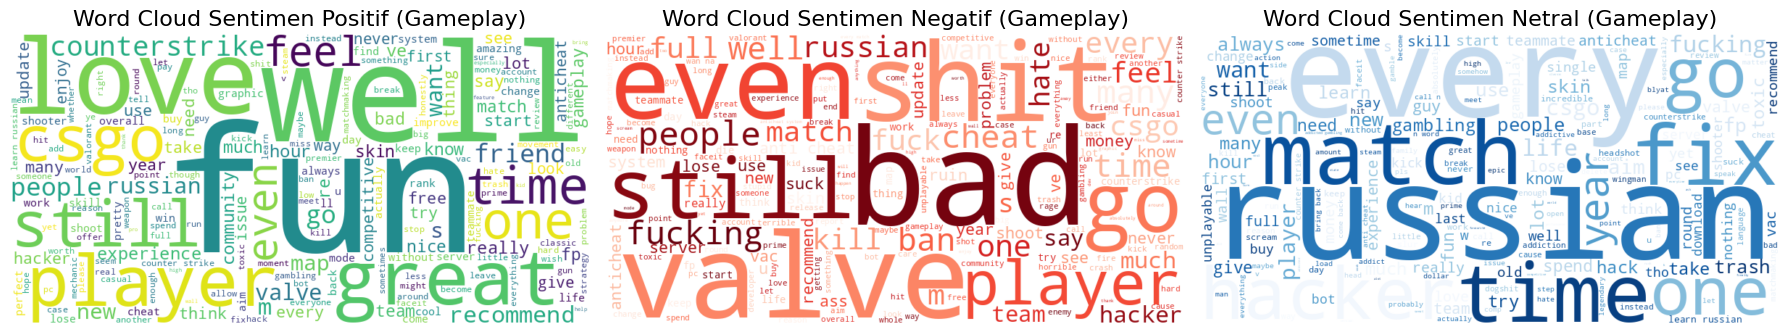

In [ ]:
# Pisahkan ulasan berdasarkan label sentimen untuk aspek gameplay
positive_gameplay = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['gameplay'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Positif')]
negative_gameplay = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['gameplay'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Negatif')]
neutral_gameplay = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['gameplay'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Netral')]

# Gabungkan semua teks ulasan positif, negatif, dan netral terkait gameplay
positive_text_gameplay = ' '.join(positive_gameplay['lemmatized_reviews'])
negative_text_gameplay = ' '.join(negative_gameplay['lemmatized_reviews'])
neutral_text_gameplay = ' '.join(neutral_gameplay['lemmatized_reviews'])

# Buat WordCloud untuk gameplay dengan tambahan stopwords
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Menambah kata "game" ke dalam stopwords
stopwords = STOPWORDS.union({"game","play","good","make","c","cs","cheater"})

# Buat WordCloud untuk gameplay (positif, negatif, netral)
wordcloud_pos_gameplay = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').generate(positive_text_gameplay)
wordcloud_neg_gameplay = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white', colormap='Reds').generate(negative_text_gameplay)
wordcloud_neutral_gameplay = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text_gameplay)

# Visualisasikan hasilnya
plt.figure(figsize=(18, 12))

# Sentimen Positif
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos_gameplay, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Positif (Gameplay)', fontsize=16)

# Sentimen Negatif
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neg_gameplay, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Negatif (Gameplay)', fontsize=16)

# Sentimen Netral
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral_gameplay, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Netral (Gameplay)', fontsize=16)

plt.tight_layout()
plt.show()


Performa Pos, Neg, Net

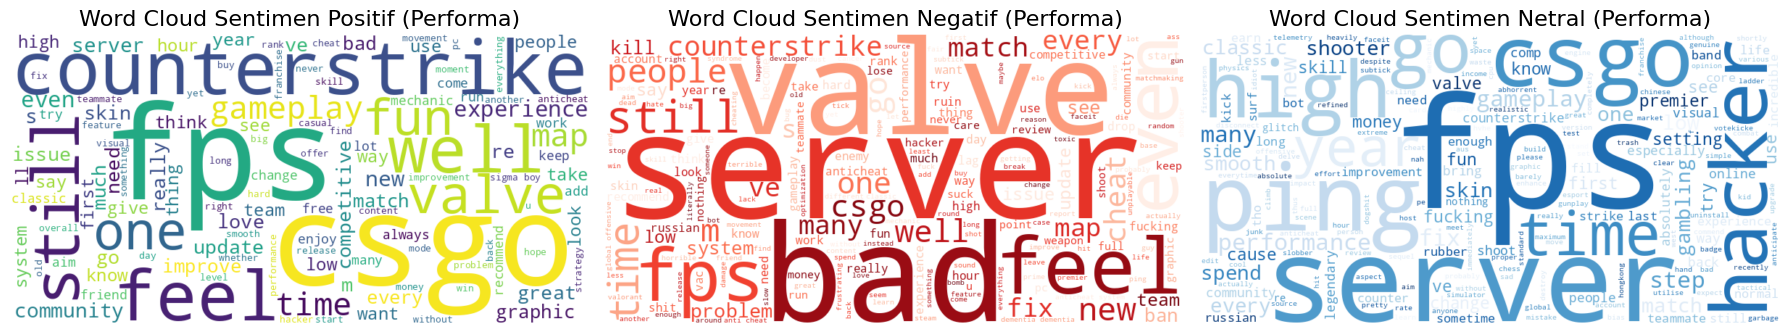

In [ ]:
# Pisahkan ulasan berdasarkan label sentimen untuk aspek performa
positive_performa = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['performance'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Positif')]
negative_performa = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['performance'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Negatif')]
neutral_performa = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['performance'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Netral')]

# Gabungkan semua teks ulasan positif, negatif, dan netral terkait performa
positive_text_performa = ' '.join(positive_performa['lemmatized_reviews'])
negative_text_performa = ' '.join(negative_performa['lemmatized_reviews'])
neutral_text_performa = ' '.join(neutral_performa['lemmatized_reviews'])

# Buat WordCloud untuk performa dengan tambahan stopwords
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Menambah kata "game" ke dalam stopwords
stopwords = STOPWORDS.union({"game","play","good","make","cheater","player","c","cs","fp"})

# Buat WordCloud untuk performa (positif, negatif, netral)
wordcloud_pos_performa = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').generate(positive_text_performa)
wordcloud_neg_performa = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white', colormap='Reds').generate(negative_text_performa)
wordcloud_neutral_performa = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text_performa)

# Visualisasikan hasilnya
plt.figure(figsize=(18, 12))

# Sentimen Positif
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos_performa, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Positif (Performa)', fontsize=16)

# Sentimen Negatif
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neg_performa, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Negatif (Performa)', fontsize=16)

# Sentimen Netral
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral_performa, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Netral (Performa)', fontsize=16)

plt.tight_layout()
plt.show()

Visualisasi Pos, Neg, Net

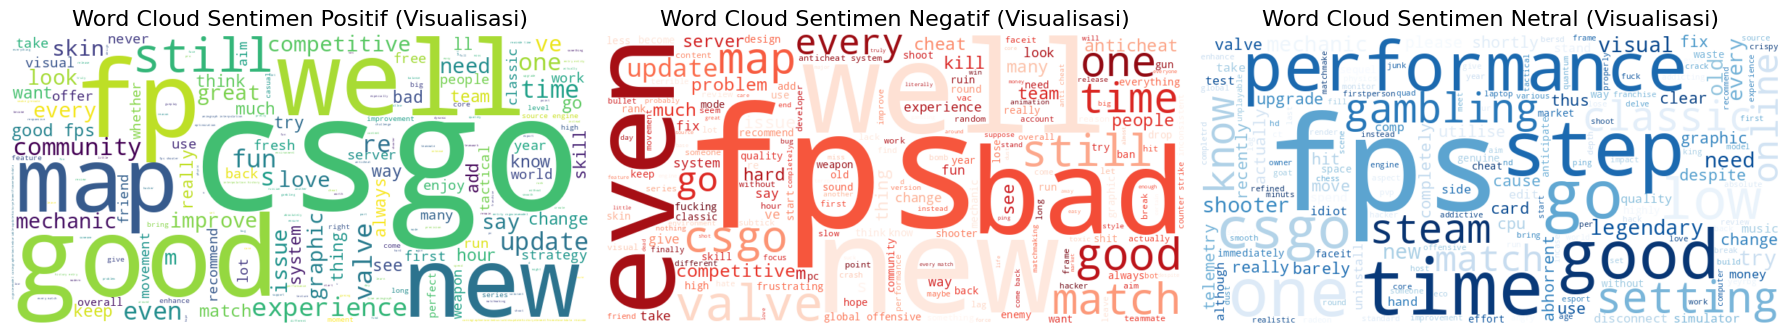

In [ ]:
# Pisahkan ulasan berdasarkan label sentimen untuk aspek visualisasi
positive_visualisasi = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['visuals'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Positif')]
negative_visualisasi = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['visuals'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Negatif')]
neutral_visualisasi = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['visuals'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Netral')]

# Gabungkan semua teks ulasan positif, negatif, dan netral terkait visualisasi
positive_text_visualisasi = ' '.join(positive_visualisasi['lemmatized_reviews'])
negative_text_visualisasi = ' '.join(negative_visualisasi['lemmatized_reviews'])
neutral_text_visualisasi = ' '.join(neutral_visualisasi['lemmatized_reviews'])

# Buat WordCloud untuk visualisasi dengan tambahan stopwords
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Menambah kata "game" ke dalam stopwords
stopwords = STOPWORDS.union({"game","player","make","play","gameplay","cheater","c","cs","counterstrike","feel"})

# Buat WordCloud untuk visualisasi (positif, negatif, netral)
wordcloud_pos_visualisasi = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').generate(positive_text_visualisasi)
wordcloud_neg_visualisasi = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white', colormap='Reds').generate(negative_text_visualisasi)
wordcloud_neutral_visualisasi = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text_visualisasi)

# Visualisasikan hasilnya
plt.figure(figsize=(18, 12))

# Sentimen Positif
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos_visualisasi, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Positif (Visualisasi)', fontsize=16)

# Sentimen Negatif
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neg_visualisasi, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Negatif (Visualisasi)', fontsize=16)

# Sentimen Netral
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral_visualisasi, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Netral (Visualisasi)', fontsize=16)

plt.tight_layout()
plt.show()

Pemain Pos, Neg, Net

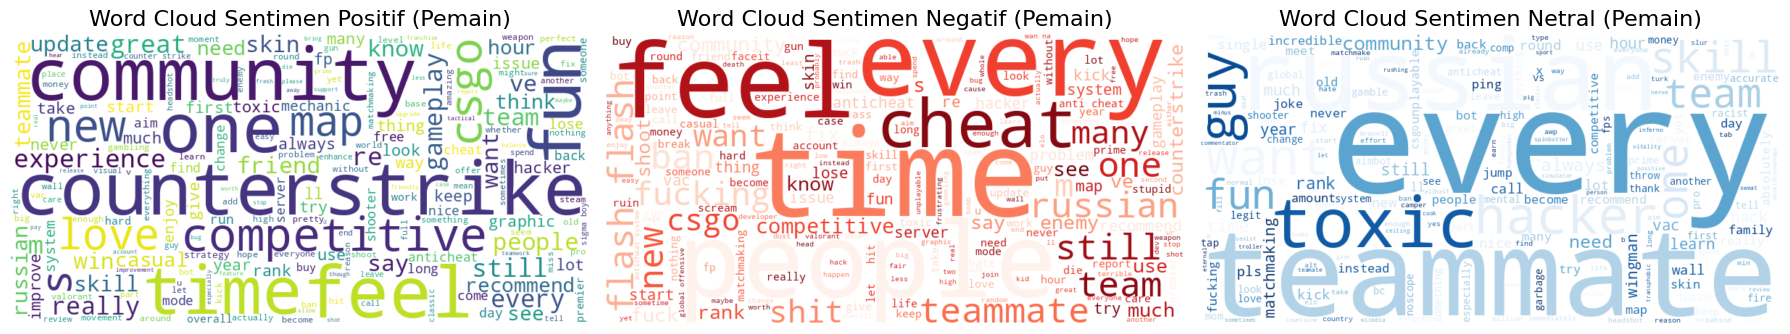

In [ ]:
# Pisahkan ulasan berdasarkan label sentimen untuk aspek pemain
positive_pemain = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['players'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Positif')]
negative_pemain = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['players'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Negatif')]
neutral_pemain = dataset_cleaned[(dataset_cleaned['aspects'].apply(lambda x: x['players'] > 0)) & (dataset_cleaned['sentiment_label'] == 'Netral')]

# Gabungkan semua teks ulasan positif, negatif, dan netral terkait pemain
positive_text_pemain = ' '.join(positive_pemain['lemmatized_reviews'])
negative_text_pemain = ' '.join(negative_pemain['lemmatized_reviews'])
neutral_text_pemain = ' '.join(neutral_pemain['lemmatized_reviews'])

# Buat WordCloud untuk pemain dengan tambahan stopwords
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stopwords = STOPWORDS.union({"game","play","cheater","c","player","cs","make","well","bad","kill","match","even","valve","good","go"})

# WordCloud untuk setiap sentimen
wordcloud_pos_pemain = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white').generate(positive_text_pemain)
wordcloud_neg_pemain = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white', colormap='Reds').generate(negative_text_pemain)
wordcloud_neutral_pemain = WordCloud(stopwords=stopwords, width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text_pemain)

# Visualisasi
plt.figure(figsize=(18, 12))

# Sentimen Positif
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_pos_pemain, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Positif (Pemain)', fontsize=16)

# Sentimen Negatif
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neg_pemain, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Negatif (Pemain)', fontsize=16)

# Sentimen Netral
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral_pemain, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Sentimen Netral (Pemain)', fontsize=16)

plt.tight_layout()
plt.show()


**Hasil pembagian data training dan data testing per aspek**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Membuat dataframe per aspek
df_gameplay = dataset_cleaned[dataset_cleaned['aspects'].apply(lambda x: x.get('gameplay', 0) == 1)]
df_performa = dataset_cleaned[dataset_cleaned['aspects'].apply(lambda x: x.get('performance', 0) == 1)]
df_visualisasi = dataset_cleaned[dataset_cleaned['aspects'].apply(lambda x: x.get('visuals', 0) == 1)]
df_pemain = dataset_cleaned[dataset_cleaned['aspects'].apply(lambda x: x.get('players', 0) == 1)]

# Fungsi untuk split dan rekap per aspek
def get_split_summary(df, aspek):
    X = df['lemmatized_reviews']
    y = df['sentiment_label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_counts = y_train.value_counts()
    test_counts = y_test.value_counts()

    total_train = train_counts.sum()
    total_test = test_counts.sum()

    rows = []
    for label in ['Positif', 'Negatif', 'Netral']:
        train_val = train_counts.get(label, 0)
        test_val = test_counts.get(label, 0)
        if label == 'Positif':  # Total hanya ditulis sekali per aspek
            rows.append([aspek, label, train_val, total_train, test_val, total_test])
        else:
            rows.append(['', label, train_val, '', test_val, ''])
    return rows

# Gabungkan semua
summary = []
summary += get_split_summary(df_gameplay, 'Gameplay')
summary += get_split_summary(df_performa, 'Performa')
summary += get_split_summary(df_visualisasi, 'Visualisasi')
summary += get_split_summary(df_pemain, 'Pemain')

# Buat DataFrame
df_summary = pd.DataFrame(summary, columns=[
    'Aspek', 'Sentimen', '80% Data Training', 'Total Training', '20% Data Testing', 'Total Testing'
])

# Tampilkan
print(df_summary.to_string(index=False))


      Aspek Sentimen  80% Data Training Total Training  20% Data Testing Total Testing
   Gameplay  Positif               1500           2951               420           738
             Negatif               1140                              254              
              Netral                311                               64              
   Performa  Positif                313            557                85           140
             Negatif                200                               47              
              Netral                 44                                8              
Visualisasi  Positif                248            363                56            91
             Negatif                 92                               30              
              Netral                 23                                5              
     Pemain  Positif                531           1068               142           268
             Negatif                469    

In [ ]:
def get_smote_summary_multiclass(df, aspek):
    X = df['lemmatized_reviews']
    y = df['sentiment_label']

    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

    train_counts = y_train.value_counts(normalize=True) * 100
    train_counts_raw = y_train.value_counts()

    # Inisialisasi default
    smote_counts = {}
    data_akhir = train_counts_raw

    if len(train_counts_raw) > 1:
        vectorizer = TfidfVectorizer(stop_words='english')
        X_train_vect = vectorizer.fit_transform(X_train)

        sm = SMOTE(random_state=42)
        try:
            X_resampled, y_resampled = sm.fit_resample(X_train_vect, y_train)
            smote_counts = y_resampled.value_counts(normalize=True) * 100
            data_akhir = y_resampled.value_counts()
        except:
            pass  # Abaikan jika SMOTE gagal

    # Buat baris untuk setiap label
    labels = ['Positif', 'Netral', 'Negatif']
    rows = []
    for label in labels:
        row = [
            aspek if label == 'Positif' else '',  # hanya tampilkan aspek di baris pertama
            label,
            f"{train_counts.get(label, 0):.1f}%",
            f"{smote_counts.get(label, '-'): .1f}%" if label in smote_counts else '-',
            data_akhir.get(label, 0)
        ]
        rows.append(row)

    return rows
summary = []
summary += get_smote_summary_multiclass(df_gameplay, 'Gameplay')
summary += get_smote_summary_multiclass(df_performa, 'Performa')
summary += get_smote_summary_multiclass(df_visualisasi, 'Visualisasi')
summary += get_smote_summary_multiclass(df_pemain, 'Pemain')

df_smote_summary = pd.DataFrame(summary, columns=[
    'Aspek', 'Kelas', '80% Data Training', '80% Data Training (SMOTE)', 'Data Akhir'
])

print(df_smote_summary.to_string(index=False))


      Aspek   Kelas 80% Data Training 80% Data Training (SMOTE)  Data Akhir
   Gameplay Positif             50.8%                     33.3%        1500
             Netral             10.5%                     33.3%        1500
            Negatif             38.6%                     33.3%        1500
   Performa Positif             56.2%                     33.3%         313
             Netral              7.9%                     33.3%         313
            Negatif             35.9%                     33.3%         313
Visualisasi Positif             64.9%                         -          98
             Netral              2.6%                         -           4
            Negatif             32.5%                         -          49
     Pemain Positif             49.7%                     33.3%         531
             Netral              6.4%                     33.3%         531
            Negatif             43.9%                     33.3%         531


**Pemodelan Klasifikasi**

Gameplay

In [ ]:
!pip install imbalanced-learn


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Data Gameplay
df_gameplay = df_gameplay

# Bagi data
X_gameplay = df_gameplay['lemmatized_reviews']
y_gameplay = df_gameplay['sentiment_label']

X_train_gameplay, X_test_gameplay, y_train_gameplay, y_test_gameplay = train_test_split(X_gameplay, y_gameplay, test_size=0.2, random_state=42)

# TF-IDF
vectorizer_gameplay = TfidfVectorizer(stop_words='english')
X_train_vect_gameplay = vectorizer_gameplay.fit_transform(X_train_gameplay)
X_test_vect_gameplay = vectorizer_gameplay.transform(X_test_gameplay)

# Model SVM (OVR)
model_gameplay = SVC(kernel='linear', decision_function_shape='ovr')
model_gameplay.fit(X_train_vect_gameplay, y_train_gameplay)
y_pred_gameplay = model_gameplay.predict(X_test_vect_gameplay)

# Confusion Matrix
cm_gameplay = confusion_matrix(y_test_gameplay, y_pred_gameplay, labels=["Positif", "Netral", "Negatif"])

# Tampilkan dalam bentuk tabel (DataFrame)
cm_gameplay_df = pd.DataFrame(cm_gameplay, index=["Positif", "Netral", "Negatif"], columns=["Positif", "Netral", "Negatif"])

print("Confusion Matrix - Aspek Gameplay")
print(cm_gameplay_df)


Confusion Matrix - Aspek Gameplay
         Positif  Netral  Negatif
Positif      371       8       41
Netral        25      21       18
Negatif       46      10      198


Performa

In [ ]:
# Data Performa
df_performa = df_performa

# Bagi data
X_performa = df_performa['lemmatized_reviews']
y_performa = df_performa['sentiment_label']

X_train_performa, X_test_performa, y_train_performa, y_test_performa = train_test_split(X_performa, y_performa, test_size=0.2, random_state=42)

# TF-IDF
vectorizer_performa = TfidfVectorizer(stop_words='english')
X_train_vect_performa = vectorizer_performa.fit_transform(X_train_performa)
X_test_vect_performa = vectorizer_performa.transform(X_test_performa)

# Model SVM (OVR)
model_performa = SVC(kernel='linear', decision_function_shape='ovr')
model_performa.fit(X_train_vect_performa, y_train_performa)
y_pred_performa = model_performa.predict(X_test_vect_performa)

# Confusion Matrix
cm_performa = confusion_matrix(y_test_performa, y_pred_performa, labels=["Positif", "Netral", "Negatif"])

# Tampilkan dalam bentuk tabel (DataFrame)
cm_performa_df = pd.DataFrame(cm_performa, index=["Positif", "Netral", "Negatif"], columns=["Positif", "Netral", "Negatif"])

print("Confusion Matrix - Aspek Performa")
print(cm_performa_df)


Confusion Matrix - Aspek Performa
         Positif  Netral  Negatif
Positif       74       0       11
Netral         6       0        2
Negatif       16       0       31


Visualisasi

In [ ]:
# Data Visualisasi
df_visualisasi = df_visualisasi

# Bagi data
X_visualisasi = df_visualisasi['lemmatized_reviews']
y_visualisasi = df_visualisasi['sentiment_label']

X_train_visualisasi, X_test_visualisasi, y_train_visualisasi, y_test_visualisasi = train_test_split(X_visualisasi, y_visualisasi, test_size=0.2, random_state=42)

# TF-IDF
vectorizer_visualisasi = TfidfVectorizer(stop_words='english')
X_train_vect_visualisasi = vectorizer_visualisasi.fit_transform(X_train_visualisasi)
X_test_vect_visualisasi = vectorizer_visualisasi.transform(X_test_visualisasi)

# Model SVM (OVR)
model_visualisasi = SVC(kernel='linear', decision_function_shape='ovr')
model_visualisasi.fit(X_train_vect_visualisasi, y_train_visualisasi)
y_pred_visualisasi = model_visualisasi.predict(X_test_vect_visualisasi)

# Confusion Matrix
cm_visualisasi = confusion_matrix(y_test_visualisasi, y_pred_visualisasi, labels=["Positif", "Netral", "Negatif"])

# Tampilkan dalam bentuk tabel (DataFrame)
cm_visualisasi_df = pd.DataFrame(cm_visualisasi, index=["Positif", "Netral", "Negatif"], columns=["Positif", "Netral", "Negatif"])

print("Confusion Matrix - Aspek Visualisasi")
print(cm_visualisasi_df)


Confusion Matrix - Aspek Visualisasi
         Positif  Netral  Negatif
Positif       24       0        0
Netral         1       0        0
Negatif       10       0        3


Pemain

In [ ]:
# Data Pemain
df_pemain = df_pemain
# Bagi data
X_pemain = df_pemain['lemmatized_reviews']
y_pemain = df_pemain['sentiment_label']

X_train_pemain, X_test_pemain, y_train_pemain, y_test_pemain = train_test_split(X_pemain, y_pemain, test_size=0.2, random_state=42)

# TF-IDF
vectorizer_pemain = TfidfVectorizer(stop_words='english')
X_train_vect_pemain = vectorizer_pemain.fit_transform(X_train_pemain)
X_test_vect_pemain = vectorizer_pemain.transform(X_test_pemain)

# Model SVM (OVR)
model_pemain = SVC(kernel='linear', decision_function_shape='ovr')
model_pemain.fit(X_train_vect_pemain, y_train_pemain)
y_pred_pemain = model_pemain.predict(X_test_vect_pemain)

# Confusion Matrix
cm_pemain = confusion_matrix(y_test_pemain, y_pred_pemain, labels=["Positif", "Netral", "Negatif"])

# Tampilkan dalam bentuk tabel (DataFrame)
cm_pemain_df = pd.DataFrame(cm_pemain, index=["Positif", "Netral", "Negatif"], columns=["Positif", "Netral", "Negatif"])

print("Confusion Matrix - Aspek Pemain")
print(cm_pemain_df)


Confusion Matrix - Aspek Pemain
         Positif  Netral  Negatif
Positif      121       0       21
Netral         9       1        8
Negatif       30       0       78


**Evaluasi Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Asumsi: 4 DataFrame sudah tersedia
aspek_data = {
    'Gameplay': df_gameplay,
    'Performa': df_performa,
    'Visualisasi': df_visualisasi,
    'Pemain': df_pemain
}

hasil_data = []

for aspek, df in aspek_data.items():
    # Bersihkan data
    df = df.dropna(subset=['lemmatized_reviews', 'sentiment_label'])

    # Skip jika jumlah data < 3 (tidak cukup untuk SMOTE)
    if df['sentiment_label'].nunique() < 2 or len(df) < 3:
        print(f"❌ Data terlalu sedikit untuk aspek: {aspek}, dilewati.")
        continue

    X = df['lemmatized_reviews']
    y = df['sentiment_label']

    # Split data
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y)
    except ValueError:
        print(f"❌ Stratified split gagal pada aspek: {aspek}, dilewati.")
        continue

    # TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # SMOTE (dengan k_neighbors=1 supaya bisa di semua kondisi)
    try:
        smote = SMOTE(random_state=42, k_neighbors=1)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)
    except ValueError as e:
        print(f"❌ SMOTE gagal pada aspek: {aspek} - {e}")
        continue

    # SVM
    model = SVC(kernel='linear', decision_function_shape='ovr')
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_tfidf)

    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)

    for label in ['Positif', 'Netral', 'Negatif']:
        if label in report:
            hasil_data.append({
                'Aspek': aspek if label == 'Positif' else '',
                'Kelas': label,
                'F1-score': round(report[label]['f1-score'] * 100, 2),
                'Macro average F1-score': f"{round(report['macro avg']['f1-score'] * 100, 2)}%" if label == 'Negatif' else '',
                'Akurasi': f"{round(accuracy * 100, 2)}%" if label == 'Negatif' else ''
            })
        else:
            # Jika label tidak ditemukan dalam prediksi
            hasil_data.append({
                'Aspek': aspek if label == 'Positif' else '',
                'Kelas': label,
                'F1-score': 0.0,
                'Macro average F1-score': f"{round(report['macro avg']['f1-score'] * 100, 2)}%" if label == 'Negatif' else '',
                'Akurasi': f"{round(accuracy * 100, 2)}%" if label == 'Negatif' else ''
            })

# Tabel akhir
hasil_df = pd.DataFrame(hasil_data)
print("\n📊 Tabel Hasil Klasifikasi SVM per Aspek:\n")
print(hasil_df.to_string(index=False))



📊 Tabel Hasil Klasifikasi SVM per Aspek:

      Aspek   Kelas  F1-score Macro average F1-score Akurasi
   Gameplay Positif     83.02                               
             Netral     48.78                               
            Negatif     77.19                 69.66%  76.96%
   Performa Positif     78.82                               
             Netral     30.77                               
            Negatif     65.98                 58.52%  72.14%
Visualisasi Positif     87.27                               
             Netral      0.00                               
            Negatif     70.00                 52.42%  81.58%
     Pemain Positif     79.42                               
             Netral     13.33                               
            Negatif     75.98                 56.25%  74.25%


**ROC dan AUC**

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Label kelas
class_labels = ['Negatif', 'Netral', 'Positif']

for aspek in aspek_list:
    print(f"\nAspek: {aspek}")
    df_aspek = df[df['aspects'] == aspek].dropna(subset=['lemmatized_reviews', 'sentiment_label'])

    X = df_aspek['lemmatized_reviews']
    y = df_aspek['sentiment_label']

    # Encode label jadi 0,1,2
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_bin = label_binarize(y_encoded, classes=[0,1,2])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42, stratify=y)

    # TF-IDF
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Model SVM (dengan probabilitas)
    clf = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))
    clf.fit(X_train_tfidf, y_train)

    # Predict probabilitas
    y_score = clf.predict_proba(X_test_tfidf)

    # ROC & AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC Curve
    plt.figure(figsize=(7,5))
    for i, label in enumerate(class_labels):
        plt.plot(fpr[i], tpr[i], label=f"{label} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.title(f"ROC Curve - Aspek: {aspek}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


NameError: name 'aspek_list' is not defined